In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#시각화 라이브러리 설치

In [3]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 1.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d7f1c91418e4e2d03519909773a606a47deb76e59cc9a0c02a228a9b2ce72705
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# 데이터 불러오기

In [2]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/titanic.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/타이타닉')
zip_ref.close()

In [3]:
df_train=pd.read_csv('/content/타이타닉/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 결측치 확인

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#cabin(객실)열은 삭제하기
df_train.drop('Cabin', axis=1, inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
#Embarked (객실 등급) 결측치 2개 행 삭제
df_train.dropna(subset=['Embarked'],inplace=True)

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [8]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df_train=df_train.reset_index()
df_train.drop('index', axis=1, inplace=True)
#df_train.drop('level_0', axis=1, inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
#age 나이 결측치 평균으로 채우기
df_train.fillna(df_train['Age'].mean(), inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [11]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


# 필요 없는 열 삭제

In [13]:
#PassengerId 열 삭제 
df_train.drop('PassengerId', axis=1, inplace=True)
#Ticket 열 삭제
df_train.drop('Ticket', axis=1, inplace=True)
#name 삭제
df_train.drop('Name', axis=1, inplace=True)

In [14]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S
885,1,1,female,19.000000,0,0,30.0000,S
886,0,3,female,29.642093,1,2,23.4500,S
887,1,1,male,26.000000,0,0,30.0000,C


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


# x,y 데이터 분리

In [16]:
X_data=df_train.drop('Survived', axis=1)
y_data=df_train['Survived']

In [17]:
X_data
# pclass(), sex(성별), age(나이), sibsp(), parch(), Embarked(객실 등급)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
884,2,male,27.000000,0,0,13.0000,S
885,1,female,19.000000,0,0,30.0000,S
886,3,female,29.642093,1,2,23.4500,S
887,1,male,26.000000,0,0,30.0000,C


In [18]:
y_data

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

# Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
enc = OneHotEncoder(sparse=False)

In [20]:
#남자 여자 LabelEncoder
X_data['Sex']=le.fit_transform(X_data['Sex'])

In [21]:
cop=X_data.copy()

In [22]:
v=X_data['Embarked'].values
set(v)

{'C', 'Q', 'S'}

In [23]:
cop['Embarked']=le.fit_transform(cop['Embarked'])
cop.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
5,3,1,29.642093,0,0,8.4583,1
6,1,1,54.000000,0,0,51.8625,2
7,3,1,2.000000,3,1,21.0750,2
8,3,0,27.000000,0,2,11.1333,2
9,2,0,14.000000,1,0,30.0708,0


In [ ]:
#Embarked 인코딩하기 label 인코딩 먼저 해주고 그다음 one hot 해주기

em=enc.fit_transform(cop[['Embarked']])
em[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
em=pd.DataFrame(em)


In [ ]:
em[2]

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
884    1.0
885    1.0
886    1.0
887    0.0
888    0.0
Name: 2, Length: 889, dtype: float64

In [ ]:
cop['Embarked: C']=em[0]
cop['Embarked: Q']=em[1]
cop['Embarked: S']=em[2]

In [ ]:
cop

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked: C,Embarked: Q,Embarked: S
0,3,1,22.000000,1,0,7.2500,2,0.0,0.0,1.0
1,1,0,38.000000,1,0,71.2833,0,1.0,0.0,0.0
2,3,0,26.000000,0,0,7.9250,2,0.0,0.0,1.0
3,1,0,35.000000,1,0,53.1000,2,0.0,0.0,1.0
4,3,1,35.000000,0,0,8.0500,2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,2,0.0,0.0,1.0
885,1,0,19.000000,0,0,30.0000,2,0.0,0.0,1.0
886,3,0,29.642093,1,2,23.4500,2,0.0,0.0,1.0
887,1,1,26.000000,0,0,30.0000,0,1.0,0.0,0.0


# 점검 및 탐색

In [ ]:
cop.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,1.535433
std,0.834700,0.477538,12.968346,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,29.642093,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


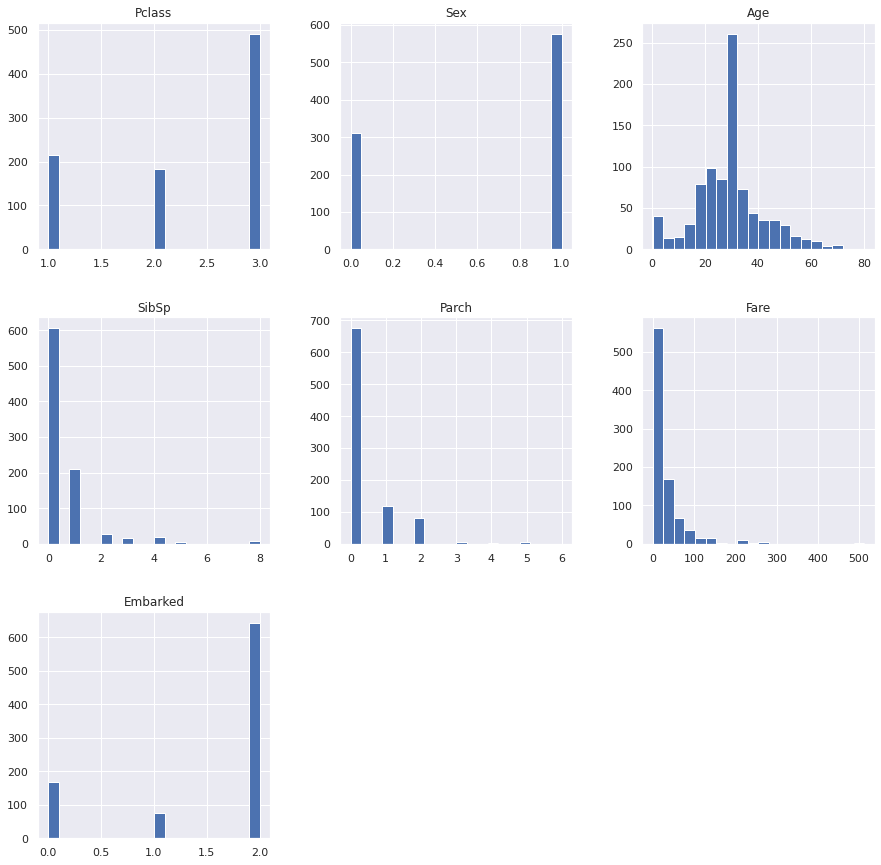

In [ ]:
#각 변수들의 히스토그램을 그려보기
cop.hist(figsize=(15,15), bins=20)

plt.show()

In [ ]:
y_data=pd.DataFrame(y_data, columns=['Survived'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e6e1ae50>]],
      dtype=object)

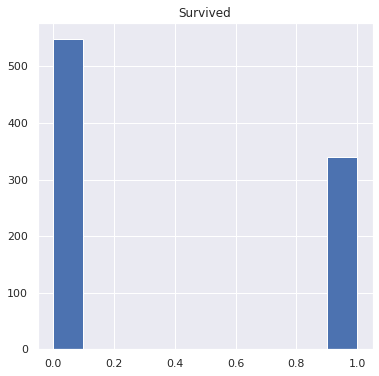

In [ ]:
#y_data (생존) 분포
y_data.hist(figsize=(6,6), bins=10)

In [ ]:
cop['Survived']=y_data
cop

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,2,0
1,1,0,38.000000,1,0,71.2833,0,1
2,3,0,26.000000,0,0,7.9250,2,1
3,1,0,35.000000,1,0,53.1000,2,1
4,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,2,0
885,1,0,19.000000,0,0,30.0000,2,1
886,3,0,29.642093,1,2,23.4500,2,0
887,1,1,26.000000,0,0,30.0000,0,1


<Figure size 1440x1440 with 0 Axes>

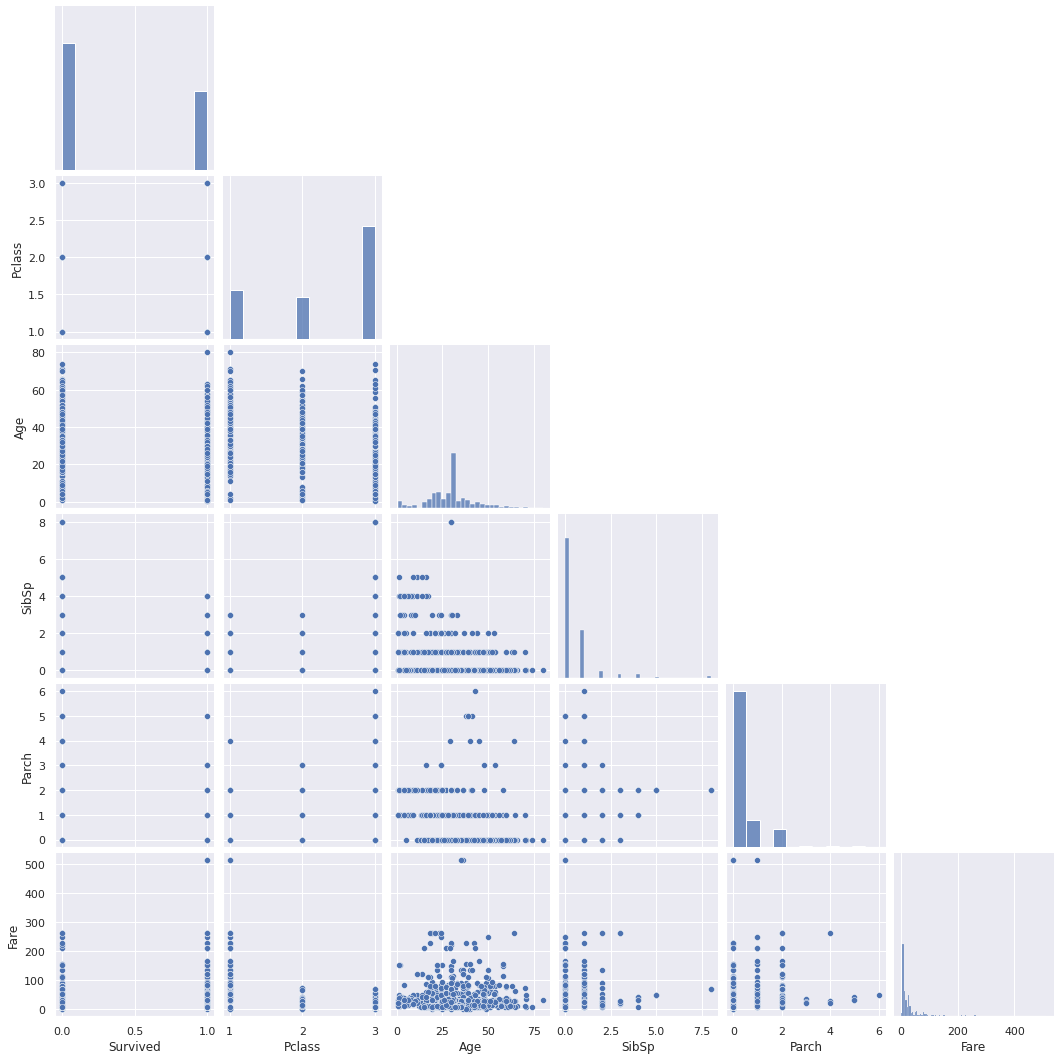

In [ ]:
plt.figure(figsize = (20,20))

sns.pairplot(df_train,corner=True)

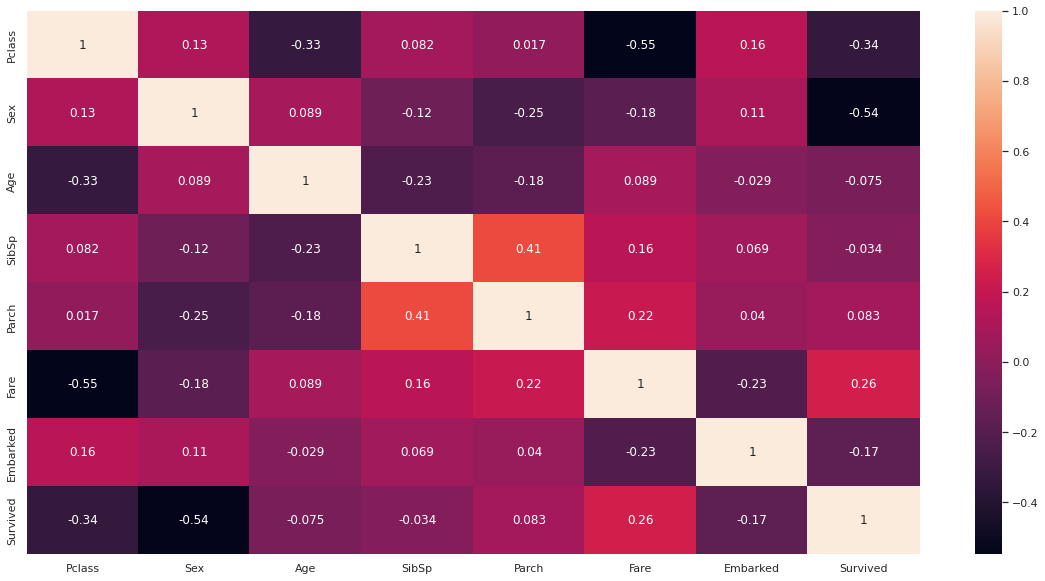

In [ ]:
#heatmap을 사용해서 각 데이터끼리의 관계 보기

plt.figure(figsize=(20,10))
sns.heatmap(cop.corr(),annot=True,cmap='rocket')

plt.xticks(rotation=360)
plt.show()

In [24]:
X_data=cop

In [25]:
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,2
885,1,0,19.000000,0,0,30.0000,2
886,3,0,29.642093,1,2,23.4500,2
887,1,1,26.000000,0,0,30.0000,0


# 데이터 분리

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 7), (178, 7), (711,), (178,))

# 전처리

In [28]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [29]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6
count,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02
mean,-1.661431e-16,7.994855e-17,-2.935611e-16,3.247910e-17,9.993569e-18,1.998714e-17,4.996784e-17
std,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00
min,-1.584104e+00,-1.405310e+00,-2.244402e+00,-4.745156e-01,-4.756437e-01,-6.521552e-01,-1.952464e+00
25%,-3.859147e-01,-1.405310e+00,-5.987288e-01,-4.745156e-01,-4.756437e-01,-4.915429e-01,-6.823801e-01
50%,8.122747e-01,7.115869e-01,-1.594897e-02,-4.745156e-01,-4.756437e-01,-3.572037e-01,5.877043e-01
75%,8.122747e-01,7.115869e-01,4.688999e-01,3.817803e-01,-4.756437e-01,-2.775706e-02,5.877043e-01
max,8.122747e-01,7.115869e-01,3.824304e+00,6.375852e+00,6.984268e+00,9.769381e+00,5.877043e-01


# 로지스틱 회귀 모델링

In [44]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log_model.score(X_train,y_train)

0.8002812939521801

In [ ]:
log_model.score(X_test,y_test)

0.7752808988764045

In [ ]:
y_pred=log_model.predict(X_train)
y_pred[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
acc_log = round(log_model.score(X_train, y_train) * 100, 2)
acc_log

80.03

In [ ]:
y_data[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [ ]:
y_pred_test=log_model.predict(X_test)
y_pred_test[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [45]:
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
acc_log_test

77.53

In [ ]:
log_model.coef_[0]

array([-0.93741898, -1.2991417 , -0.57144862, -0.44429355, -0.06313049,
        0.07790865, -0.21890968])

In [ ]:
coeff_df = pd.DataFrame(X_data.columns.delete(0)) #X_data의 columns들을 value인 데이터프레임 생성
coeff_df.columns = ['Feature'] #그 column의 이름 
coeff_df["Correlation"] = pd.Series(log_model.coef_[0])# Correlation의 열을 만들고 생성한 모델의 기울기(coef를 넣어줌)

coeff_df.sort_values(by='Correlation', ascending=False)#크기가 큰 순서부터 정렬해줌

,Feature,Correlation
5,Embarked,0.077909
4,Fare,-0.063130
3,Parch,-0.444294
2,SibSp,-0.571449
0,Sex,-0.937419
1,Age,-1.299142


In [ ]:
print('train score : {:.3f}'.format(log_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(log_model.score(X_test, y_test)))

train score : 0.800
test socre : 0.775


# SVM

In [39]:
#grid search 사용
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV

svm=SVC()

svm_param=[{'kernel':['poly'], 'C':[10,30,100,300,1000.,3000.,10000.,30000.0]},
           {'kernel':['rbf'], 'C':[1.0,3.0,10.,30.,100.,300.,1000.0], 'gamma':[0.01,0.03, 0.1,1.0,3.0]}
          ]

gs=GridSearchCV(svm,
                param_grid=svm_param,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=2
                )

gs.fit(X_train,y_train)

Fitting 2 folds for each of 43 candidates, totalling 86 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [10, 30, 100, 300, 1000.0, 3000.0, 10000.0,
                                30000.0],
                          'kernel': ['poly']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [40]:
#최적의 파라미터 조합 출력
svm_best=gs.best_estimator_
print(svm_best)

print(gs.best_score_)#최고 점수

SVC(C=10.0, gamma=0.03)
0.8129213483146067


In [41]:
print('train score : {:.3f}'.format(svm_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(svm_best.score(X_test, y_test)))

train score : 0.837
test socre : 0.820


In [ ]:
#기존1
svm_model=SVC(kernel='poly', C=1, gamma=1).fit(X_train,y_train)

print('train score : {:.3f}'.format(svm_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(svm_model.score(X_test, y_test)))

train score : 0.865
test socre : 0.815


In [43]:
#기존2
svm_model=SVC(kernel='rbf', C=10.0, gamma=0.03).fit(X_train,y_train)

print('train score : {:.3f}'.format(svm_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(svm_model.score(X_test, y_test)))

train score : 0.837
test socre : 0.820


In [ ]:
y_ped=svm_model.predict(X_train)
print(y_pred[:10])

y_pred_test=svm_model.predict(X_test)
print(y_pred_test[:10])

[1 1 0 0 0 1 0 0 0 1]
[0 1 1 0 1 0 0 0 1 1]


In [ ]:
#확률 
svm_model.decision_function(X_test)[:10]

array([-1.00713706, 14.84544465,  2.15170573, -1.00003033, 19.09338155,
       -1.01444077, -0.98186457, -1.07542956,  3.46415351,  8.15934425])

In [46]:
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
acc_svm_test

82.02

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier( criterion='entropy',
                                max_depth=5,
                                random_state=0)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [48]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.847
test socre : 0.809


In [56]:
#grid search 사용해보기

DTC = DecisionTreeClassifier(random_state=41, )

dtc_param_grid={'criterion':['gini','entropy'],
                'max_depth':[2,3,4,5,6,7,8,9],
                'min_samples_leaf':[1,2,3,4,5,7,9]
                }

gs=GridSearchCV(DTC,
                param_grid=dtc_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1
                )
gs.fit(X_train,y_train)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9]},
             scoring='accuracy', verbose=1)

In [57]:
#최적의 파라미터 조합 출력
dtc_best=gs.best_estimator_
print(dtc_best)

print(gs.best_score_)#최고 점수

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=41)
0.8143535369520494


In [62]:
dt_model=DecisionTreeClassifier( criterion='entropy',
                                max_depth=8,
                                random_state=41,
                                min_samples_leaf=7
                                )
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7,
                       random_state=41)

In [63]:
print('train score : {:.3f}'.format(dt_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(dt_model.score(X_test, y_test)))

train score : 0.868
test socre : 0.815


In [64]:
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
acc_dt_test

81.46

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier(100,
                                    max_depth=1,
                                    max_features=2)
forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, max_features=2)

In [67]:
print('train score : {:.3f}'.format(forest_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(forest_model.score(X_test, y_test)))

train score : 0.788
test socre : 0.809


In [68]:
#grid search

rf=RandomForestClassifier(random_state=0,)

rf_param_grid={'n_estimators':[100,200,300,400],
               'max_features':[1,2,3],
               'max_depth':[1,2,3,5,6],}

gs=GridSearchCV(rf,
                param_grid=rf_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1)
gs.fit(X_train,y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 5, 6],
                         'max_features': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [69]:
#최적의 파라미터 조합 출력
rf_best=gs.best_estimator_
print(rf_best)

print(gs.best_score_)#최고 점수

RandomForestClassifier(max_depth=6, max_features=1, n_estimators=400,
                       random_state=0)
0.8213760088621618


In [70]:
rf_model=RandomForestClassifier(400,
                                max_depth=6,
                                min_samples_leaf=12,
                                max_features=1,
                                random_state=0,
                                )
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=1, min_samples_leaf=12,
                       n_estimators=400, random_state=0)

In [71]:
print('train score : {:.3f}'.format(rf_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(rf_model.score(X_test, y_test)))

train score : 0.837
test socre : 0.826


In [72]:
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
acc_rf_test

82.58

# Ada Boost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier(n_estimators=9, learning_rate=0.5)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=9)

In [74]:
print('train score : {:.3f}'.format(ada_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(ada_model.score(X_test, y_test)))

train score : 0.796
test socre : 0.798


In [165]:
#grid search 현재까지는 이게 베스트
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)

ada_param_grid={'algorithm':['SAMME', 'SAMME.R'],
                'base_estimator__max_depth':[1,3,5],
                'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                'n_estimators':[1,20,30]}
gs=GridSearchCV(ADA,
                param_grid=ada_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1)

gs.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=7),
             n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [1, 3, 5],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                         'n_estimators': [1, 20, 30]},
             scoring='accuracy', verbose=1)

In [77]:
#grid search2
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)

ada_param_grid={'algorithm':['SAMME', 'SAMME.R'],
                'base_estimator__max_depth':[1,3,5,7],
                'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                'n_estimators':[10,20,40,50]}
gs=GridSearchCV(ADA,
                param_grid=ada_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1)

gs.fit(X_train, y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=7),
             n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [1, 3, 5, 7],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                         'n_estimators': [10, 20, 40, 50]},
             scoring='accuracy', verbose=1)

In [166]:
ada_best=gs.best_estimator_
print(ada_best)

print(gs.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=20, random_state=7)
0.8185828453869284


In [167]:
ada_model=AdaBoostClassifier(n_estimators=20, learning_rate=0.01, random_state=7, algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=3))
ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=20, random_state=7)

In [168]:
print('train score : {:.3f}'.format(ada_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(ada_model.score(X_test, y_test)))

train score : 0.823
test socre : 0.820


In [169]:
acc_ada_test=round(ada_model.score(X_test,y_test)*100,2)
acc_ada_test

82.02

#KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier 

kn_model=KNeighborsClassifier()

kn_model.fit(X_train,y_train)

print('train score : {:.3f}'.format(kn_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(kn_model.score(X_test, y_test)))

train score : 0.872
test socre : 0.792


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors":range(1,20),
    "knn__p":[1,2,3,4]
}

gs = GridSearchCV(pipeline,
                 param_grid=param_grid,
                 cv=2)

In [116]:
gs.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20),
                         'knn__p': [1, 2, 3, 4]})

In [117]:
knn_best=gs.best_estimator_
print(knn_best)

print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=12, p=1))])
0.8143139737300206


In [118]:
gs.best_params_

{'knn__n_neighbors': 12, 'knn__p': 1}

In [119]:
knn_best.fit(X_train,y_train)

print('train score : {:.3f}'.format(knn_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(knn_best.score(X_test, y_test)))

train score : 0.851
test socre : 0.798


In [120]:
knn_ada_test=round(knn_best.score(X_test,y_test)*100,2)
knn_ada_test

79.78

# 점수 종합

In [121]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'Decision Tree','Random Forest',
              'Ada Boost', 'KNN'],
              
    'Score': [acc_log_test, acc_svm_test,
              acc_dt_test, acc_rf_test,
              acc_ada_test, knn_ada_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.58
4,Ada Boost,82.58
1,Support Vector Machines,82.02
2,Decision Tree,81.46
5,KNN,79.78
0,Logistic Regression,77.53


# 실제 적용해보기

In [122]:
df_y=pd.read_csv('/content/타이타닉/gender_submission.csv')
df_y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [123]:
df_test=pd.read_csv('/content/타이타닉/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [124]:
df_copy=df_test.copy()

##결측치 확인 

In [125]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [126]:
#cabin 행 삭제
df_test.drop('Cabin', axis=1, inplace=True)

In [127]:
#Fare 결측치 하나 삭제 

df_test.fillna({'Fare':df_test['Fare'].mean()}, inplace=True)# 이 방법을 하면 내가 하고싶은 곳만 변경 가능

In [128]:
#age 나이 결측치 평균으로 채우기
df_test.fillna({'Age':df_test['Age'].mean()}, inplace=True)

In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


##필요 없는 열 삭제

In [130]:
#PassengerId 열 삭제 
df_test.drop('PassengerId', axis=1, inplace=True)
#Ticket 열 삭제
df_test.drop('Ticket', axis=1, inplace=True)
#name 삭제
df_test.drop('Name', axis=1, inplace=True)

In [131]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


##Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
enc = OneHotEncoder(sparse=False)

In [134]:
#남자 여자 LabelEncoder
df_test['Sex']=le.fit_transform(df_test['Sex'])

In [135]:
df_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q


In [136]:
#Embarked LabelEncoder
df_test['Embarked']=le.fit_transform(df_test['Embarked'])

In [137]:
df_test.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2
417,3,1,30.27259,1,1,22.3583,0


## 전처리

In [138]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()

df_test=std.fit_transform(df_test)

In [139]:
pd.DataFrame(df_test).describe()

,0,1,2,3,4,5,6
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,1.487380e-17,3.824692e-17,3.187243e-17,-1.593622e-17,-2.974760e-17,-1.806104e-17,-1.444884e-16
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00
min,-1.505120e+00,-1.322876e+00,-2.385419e+00,-4.994700e-01,-4.002477e-01,-6.387815e-01,-1.642598e+00
25%,-1.505120e+00,-1.322876e+00,-5.763018e-01,-4.994700e-01,-4.002477e-01,-4.972129e-01,-4.709154e-01
50%,8.734819e-01,7.559289e-01,0.000000e+00,-4.994700e-01,-4.002477e-01,-3.796234e-01,7.007669e-01
75%,8.734819e-01,7.559289e-01,4.340463e-01,6.169924e-01,-4.002477e-01,-7.399887e-02,7.007669e-01
max,8.734819e-01,7.559289e-01,3.623577e+00,8.432229e+00,8.781044e+00,8.547081e+00,7.007669e-01


# 실제 test용 정리

In [175]:
y_pred=ada_model.predict(df_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [176]:
y=pd.DataFrame(y_pred, columns=['Survived'])
y[:20]

,Survived
0,0
1,1
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,0


In [177]:
y['PassengerId']=df_copy['PassengerId'].values

In [178]:
y=y.reindex(['PassengerId','Survived'], axis=1)
y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [174]:
df_y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#csv 파일로 만들기

y.to_csv('./titanic predict_1.csv', index=False)

##두번째  해보기 

In [185]:
#두번째 
y_pred=dt_model.predict(df_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [186]:
y=pd.DataFrame(y_pred, columns=['Survived'])
y['PassengerId']=df_copy['PassengerId'].values
y=y.reindex(['PassengerId','Survived'], axis=1)

In [187]:
y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [188]:
#csv 파일로 만들기

y.to_csv('./titanic predict_2(의사결정트리).csv', index=False)

# 실제값과 예측값 비교

In [189]:
#두번째  비교
df_pred=pd.read_csv('/content/titanic predict_2(의사결정트리).csv')

In [ ]:
df_y

In [ ]:
df_y.compare(df_pred)

In [156]:
#첫번째 adaboost 비교
df_pred=pd.read_csv('/content/titanic predict_1.csv')
df_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [157]:
df_y.compare(df_pred)

Survived      
        self other
5        0.0   1.0
21       0.0   1.0
80       0.0   1.0
89       0.0   1.0
140      1.0   0.0
161      0.0   1.0
188      1.0   0.0
192      0.0   1.0
201      0.0   1.0
281      0.0   1.0
307      0.0   1.0
365      1.0   0.0
367      1.0   0.0
389      0.0   1.0
392      0.0   1.0